In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv('04_result.csv').set_index('Unnamed: 0')
predicts = pd.read_csv('predicts.csv').set_index('Unnamed: 0')
df.index.names = ['']
predicts.index.names = ['']

In [2]:
df = df[['ItraxxMain', 'EuSt_Price']]
df

,ItraxxMain,EuSt_Price
,,
2007-03-20,100.0000,4079.5200
2007-03-21,100.0287,4078.2900
2007-03-22,100.0833,4170.0801
2007-03-23,100.1090,4191.5801
2007-03-26,100.1063,4142.1099
...,...,...
2021-12-21,116.2111,4174.9902
2021-12-22,116.2445,4217.0601
2021-12-23,116.3149,4265.8599


In [3]:
predicts = predicts[['prediction: future_return-Itraxx-Main', 'prediction: future_return-Euro-Stoxx']]
predicts

,prediction: future_return-Itraxx-Main,prediction: future_return-Euro-Stoxx
,,
2007-03-21,0.000167,0.005626
2007-03-22,-0.000318,-0.001487
2007-03-23,0.000044,-0.000241
2007-03-26,-0.000070,-0.000092
2007-03-27,0.000043,-0.000502
...,...,...
2021-12-21,0.000116,0.000797
2021-12-22,0.000105,0.000751
2021-12-23,0.000085,0.000029


In [4]:
df = df.merge(predicts, left_index=True, right_index=True)
df

,ItraxxMain,EuSt_Price,prediction: future_return-Itraxx-Main,prediction: future_return-Euro-Stoxx
,,,,
2007-03-21,100.0287,4078.2900,0.000167,0.005626
2007-03-22,100.0833,4170.0801,-0.000318,-0.001487
2007-03-23,100.1090,4191.5801,0.000044,-0.000241
2007-03-26,100.1063,4142.1099,-0.000070,-0.000092
2007-03-27,100.0982,4153.6099,0.000043,-0.000502
...,...,...,...,...
2021-12-21,116.2111,4174.9902,0.000116,0.000797
2021-12-22,116.2445,4217.0601,0.000105,0.000751
2021-12-23,116.3149,4265.8599,0.000085,0.000029


In [5]:
df['ItraxxMain-next'] = df['ItraxxMain'].shift(-1)
df['EuSt_Price-next'] = df['EuSt_Price'].shift(-1)

In [6]:
df = df.dropna()
df

,ItraxxMain,EuSt_Price,prediction: future_return-Itraxx-Main,prediction: future_return-Euro-Stoxx,ItraxxMain-next,EuSt_Price-next
,,,,,,
2007-03-21,100.0287,4078.2900,0.000167,0.005626,100.0833,4170.0801
2007-03-22,100.0833,4170.0801,-0.000318,-0.001487,100.1090,4191.5801
2007-03-23,100.1090,4191.5801,0.000044,-0.000241,100.1063,4142.1099
2007-03-26,100.1063,4142.1099,-0.000070,-0.000092,100.0982,4153.6099
2007-03-27,100.0982,4153.6099,0.000043,-0.000502,100.0918,4128.2002
...,...,...,...,...,...,...
2021-12-20,116.1330,4107.1299,0.000067,0.004942,116.2111,4174.9902
2021-12-21,116.2111,4174.9902,0.000116,0.000797,116.2445,4217.0601
2021-12-22,116.2445,4217.0601,0.000105,0.000751,116.3149,4265.8599


In [10]:
df.index = pd.to_datetime(df.index).date
df

,ItraxxMain,EuSt_Price,prediction: future_return-Itraxx-Main,prediction: future_return-Euro-Stoxx,ItraxxMain-next,EuSt_Price-next
2007-03-21,100.0287,4078.2900,0.000167,0.005626,100.0833,4170.0801
2007-03-22,100.0833,4170.0801,-0.000318,-0.001487,100.1090,4191.5801
2007-03-23,100.1090,4191.5801,0.000044,-0.000241,100.1063,4142.1099
2007-03-26,100.1063,4142.1099,-0.000070,-0.000092,100.0982,4153.6099
2007-03-27,100.0982,4153.6099,0.000043,-0.000502,100.0918,4128.2002
...,...,...,...,...,...,...
2021-12-20,116.1330,4107.1299,0.000067,0.004942,116.2111,4174.9902
2021-12-21,116.2111,4174.9902,0.000116,0.000797,116.2445,4217.0601
2021-12-22,116.2445,4217.0601,0.000105,0.000751,116.3149,4265.8599
2021-12-23,116.3149,4265.8599,0.000085,0.000029,116.3138,4284.8301


In [11]:
df = df[df.index > datetime.date(year=2019, month=1, day=1)]
df

,ItraxxMain,EuSt_Price,prediction: future_return-Itraxx-Main,prediction: future_return-Euro-Stoxx,ItraxxMain-next,EuSt_Price-next
2019-01-02,110.8989,2993.1799,0.000057,0.000786,110.7061,2954.6599
2019-01-03,110.7061,2954.6599,-0.000051,-0.004412,110.9508,3041.8501
2019-01-04,110.9508,3041.8501,0.000399,0.002105,111.0283,3033.6399
2019-01-07,111.0283,3033.6399,0.000195,0.001033,111.1037,3054.9399
2019-01-08,111.1037,3054.9399,0.000177,0.000793,111.2733,3070.2400
...,...,...,...,...,...,...
2021-12-20,116.1330,4107.1299,0.000067,0.004942,116.2111,4174.9902
2021-12-21,116.2111,4174.9902,0.000116,0.000797,116.2445,4217.0601
2021-12-22,116.2445,4217.0601,0.000105,0.000751,116.3149,4265.8599
2021-12-23,116.3149,4265.8599,0.000085,0.000029,116.3138,4284.8301


In [47]:
def get_sharpe_ratio(a):
    alternative = []
    for i in range(len(a)):
        alternative.append((1 + 0.04/365)**i)

    x = np.array(a)
    y = np.array(alternative) - 1
    return_ = x / x[0] - 1
    return (return_ - y).mean() / return_.std()

0.5590423818954359


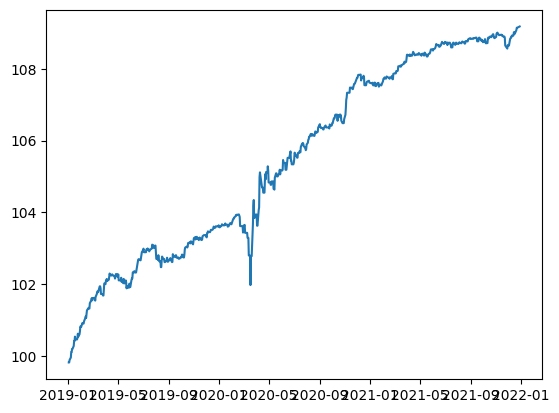

In [50]:
money = 100

index_log = []
money_log = []

for index, row in df.iterrows():
    if row['prediction: future_return-Itraxx-Main'] > 0:
        money = row['ItraxxMain-next']/row['ItraxxMain'] * money
    index_log.append(index)
    money_log.append(money)

plt.plot(index_log, money_log)
print(get_sharpe_ratio(money_log))

1.2493251650986545


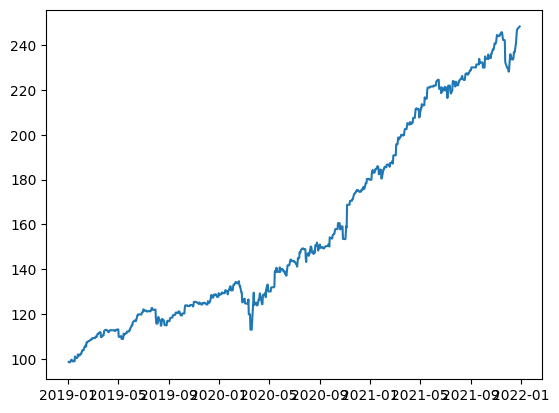

In [52]:
money = 100

index_log = []
money_log = []

for index, row in df.iterrows():
    if row['prediction: future_return-Euro-Stoxx'] > 0:
        money = row['EuSt_Price-next']/row['EuSt_Price'] * money
    index_log.append(index)
    money_log.append(money)

plt.plot(index_log, money_log)
print(get_sharpe_ratio(money_log))

0.525257819992667


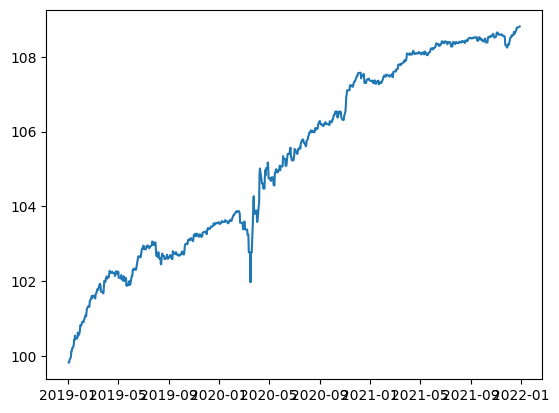

In [51]:
money = 100

index_log = []
money_log = []

for index, row in df.iterrows():
    if row['prediction: future_return-Itraxx-Main'] > 0:
        money += (row['ItraxxMain-next']/row['ItraxxMain'] - 1) * 100
    index_log.append(index)
    money_log.append(money)

plt.plot(index_log, money_log)
print(get_sharpe_ratio(money_log))

1.4868435449972675


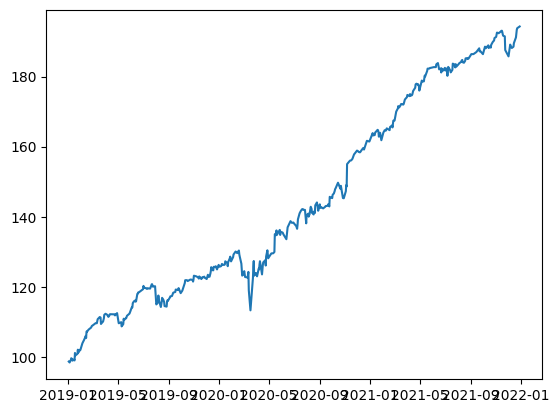

In [53]:
money = 100

index_log = []
money_log = []

for index, row in df.iterrows():
    if row['prediction: future_return-Euro-Stoxx'] > 0:
        money += (row['EuSt_Price-next']/row['EuSt_Price'] - 1) * 100
        index_log.append(index)
        money_log.append(money)

plt.plot(index_log, money_log)
print(get_sharpe_ratio(money_log))

1.4333214381850903


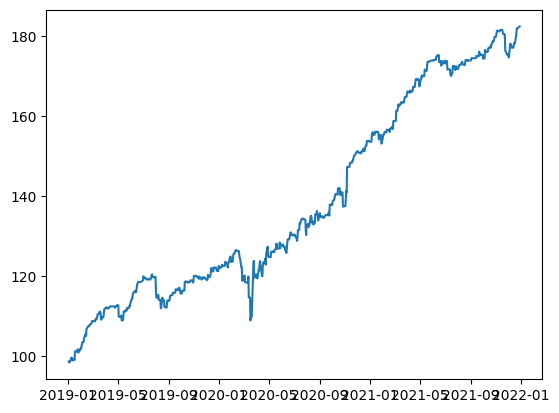

In [56]:
money = 100

index_log = []
money_log = []

for index, row in df.iterrows():
    ret_Eu = row['prediction: future_return-Euro-Stoxx']
    ret_It = row['prediction: future_return-Itraxx-Main']

    if ret_Eu > max(ret_It, 0):
        money += (row['EuSt_Price-next']/row['EuSt_Price'] - 1) * 100
    elif ret_It > max(ret_Eu, 0):
        money += (row['ItraxxMain-next']/row['ItraxxMain'] - 1) * 100

    index_log.append(index)
    money_log.append(money)

plt.plot(index_log, money_log)
print(get_sharpe_ratio(money_log))